# Demonstration of functions operating on UV spectra for NurF

In [1]:
from ess.loki.nurf import utils, uv, plot
from ess.loki.nurf import ill_auxilliary_funcs as ill 

# standard library imports
import itertools
import os
from typing import Optional, Type, Union

# related third party imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from scipy.optimize import leastsq  # needed for fitting of turbidity

# local application imports
import scippnexus as snx
import scipp as sc


In [2]:
# Prepare for export to .dat for uv and fluo

# path to LOKI-like files
process_folder='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version'
# change to folder
os.chdir(process_folder)

# export path for .dat files
path_output='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version/dat-files'
graphpath_output='/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version/graphs'

# experimental data sets
exp5= [66017, 66020, 66023, 66026, 66029, 66032, 66034, 66037, 66040, 66043, 66046]
exp6= [66050, 66053, 66056, 66059, 66062, 66065, 66068, 66071, 66074, 66077, 66080]

exp2= [65925, 65927, 65930, 65933, 65936, 65939, 65942, 65945, 65948, 65951, 65954, 65957]
exp3= [65962, 65965, 65968, 65971, 65974, 65977, 65980, 65983, 65986, 65989, 65992]

exp7= [66083, 66086, 66089, 66092, 66095, 66098, 66101, 66104, 66107, 66110, 66113]
exp8= [66116, 66119, 66122, 66125, 66128, 66131, 66134, 66137, 66140, 66143, 66146]

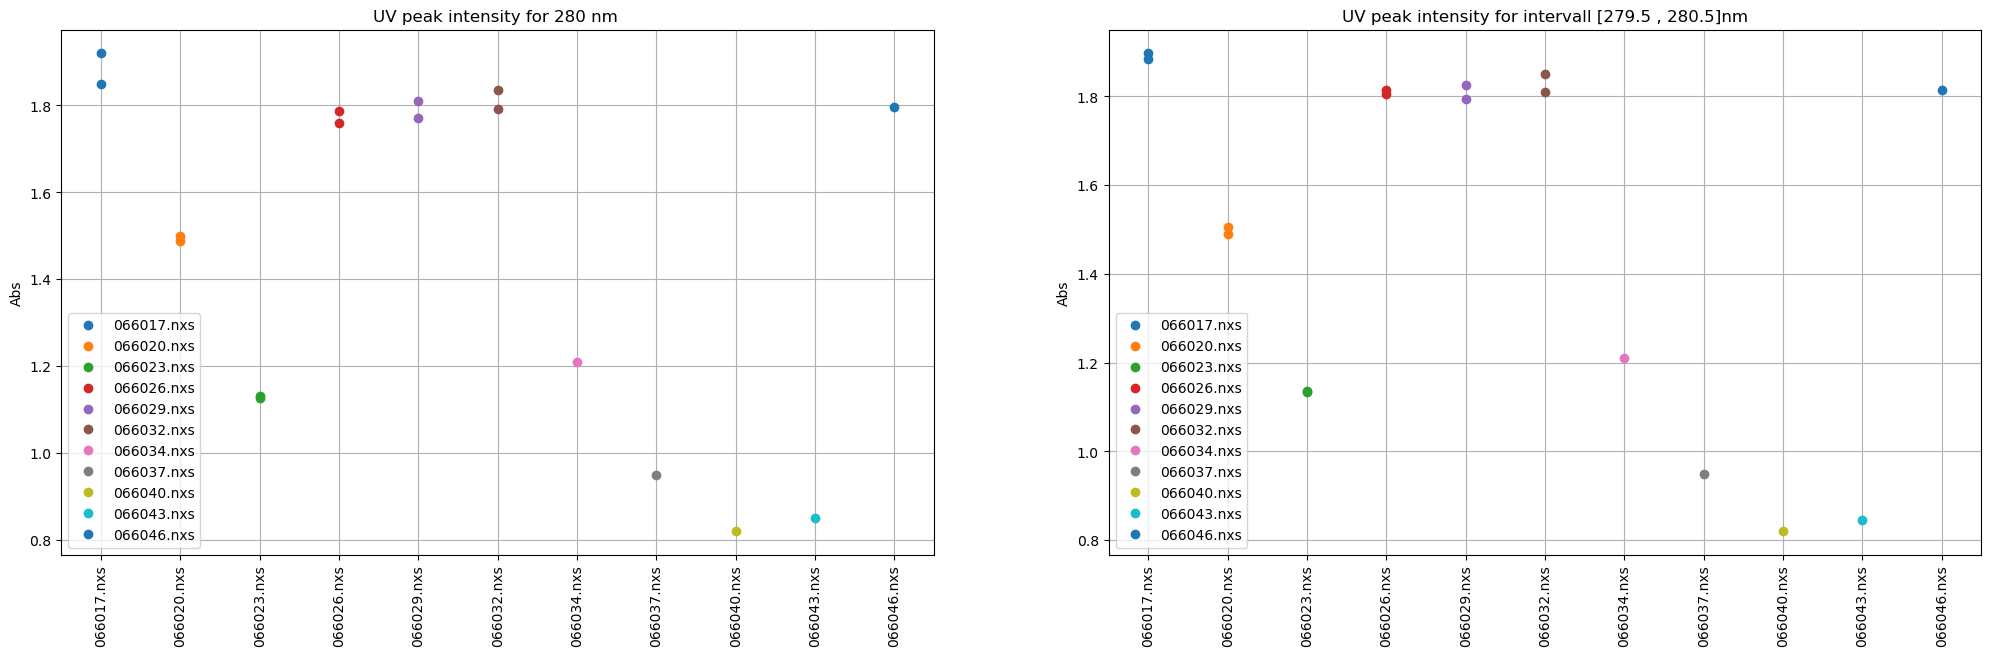

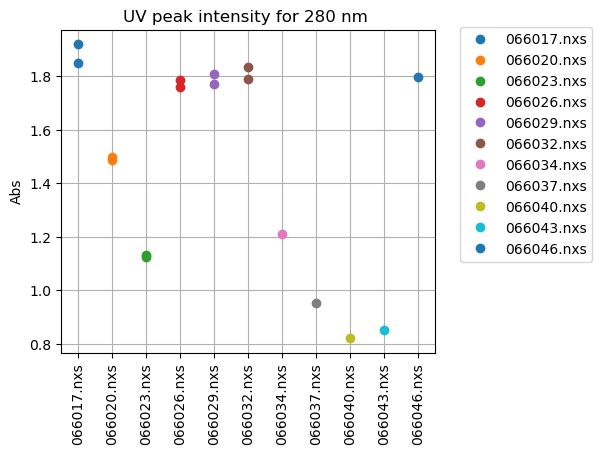

In [3]:
filesetlist=ill.complete_fname(exp5)
fig=plot.plot_multiple_uv_peak_int(filesetlist, wavelength= sc.scalar(280, unit='nm'))

graph_name=f"UV_peak_exp5.pdf"
graph_out=os.path.join(graphpath_output, graph_name)
plt.savefig(graph_out,dpi=1200,bbox_inches='tight')



In [4]:
#params = {
#    'font.size': 40,
#}
#plt.rcParams.update(params)

ax0=fig.get_axes()[0]
extent = ax0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
graph_name=f"UV_peak_exp5_subplot_0.pdf"
graph_out_subplot=os.path.join(graphpath_output, graph_name)

fig.savefig(graph_out_subplot, bbox_inches=extent.expanded(1.2, 1.38), dpi=1200)

<scipp.DataArray>
Dimensions: Sizes[spectrum:2, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [-1.08092, -0.615608, ..., -0.14863, -0.14863]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066029.nxs", "066029.nxs"]

/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ILL_947_June_2021/212/d22/exp_9-13-947/processed/ess_version


/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(rect=self.bounding_box)


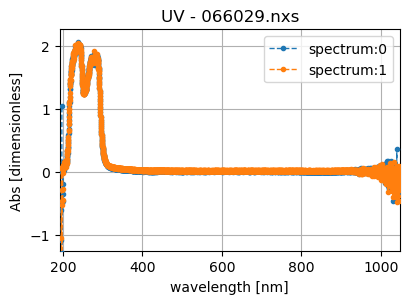

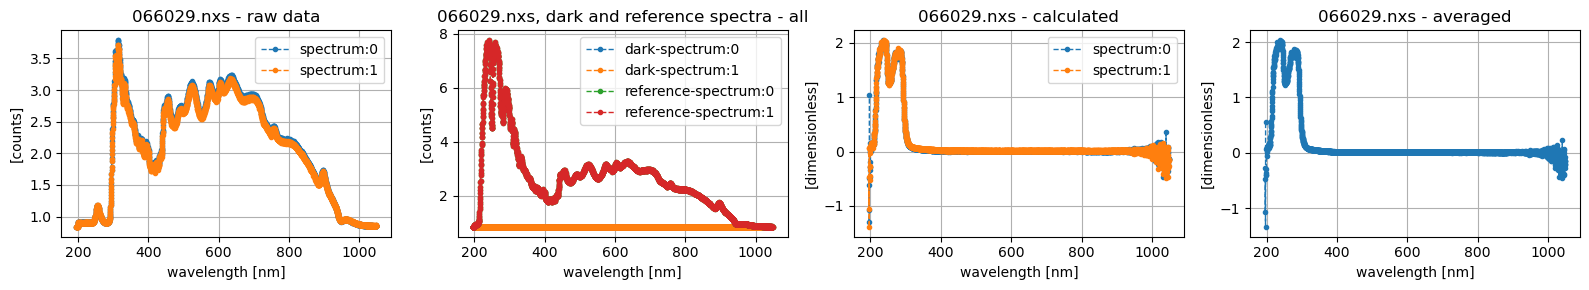

In [5]:
from ess.loki.nurf import ill_auxilliary_funcs

name='066017.nxs'
name='066029.nxs'
exp_meth='uv'

# load a file and caluclate corrected uv spectra
uv_dict=utils.load_nurfloki_file(name,exp_meth)
uv_da=uv.normalize_uv(**uv_dict)

display(uv_da)

#quick plot
!pwd

graph_name=f"UV_spectra_{name}.pdf"
graph_out=os.path.join(graphpath_output, graph_name)
cm = 1/2.54  # centimeters in inches
figsize_b=8
figsize_a=1.333*figsize_b
dpi=300


fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(figsize_a*cm, figsize_b*cm) )
out1=sc.plot(sc.collapse(uv_da, keep="wavelength"),
      linestyle="dashed",
        grid=True,
        marker='.',
        title=f"UV - {name}",
        ylabel='Abs [dimensionless]',
        #filename=graph_out,
        ax=ax1)   
#out1.ax.set_xlim(300,400)

#out1.ax.set_ylim([np.nanmin(uv_da.data.values), np.nanmax(np.nanmin(uv_da.data.values))])
out1.ax.set_xlim([np.min(uv_da.coords["wavelength"].values)*0.98, np.max(uv_da.coords["wavelength"].values)])
out1.ax.set_ylim([np.nanmin(uv_da.data.values)*0.9, np.nanmax(uv_da.data.values)*1.1])

plt.tight_layout()
plt.savefig(graph_out, dpi=dpi,bbox_inches='tight')


sc.show(uv_da)


#better plot
plot.plot_uv(name)



## Cell belows shows how to plot all UV spectra in a single series

/Users/gudlo523/Library/CloudStorage/OneDrive-LundUniversity/UU/ESS-scipp/ess/docs/instruments/loki/nurf/ess/loki/nurf/plot.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(1, 4, figsize=(16, 3))


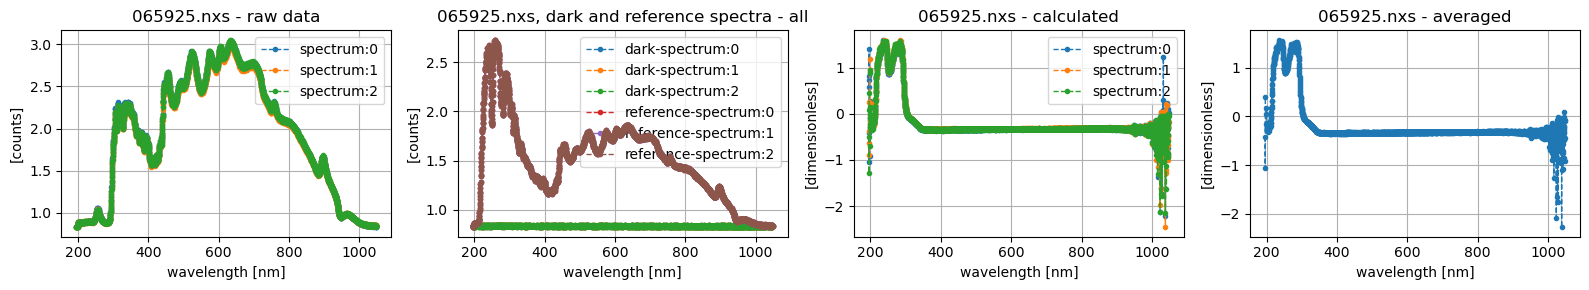

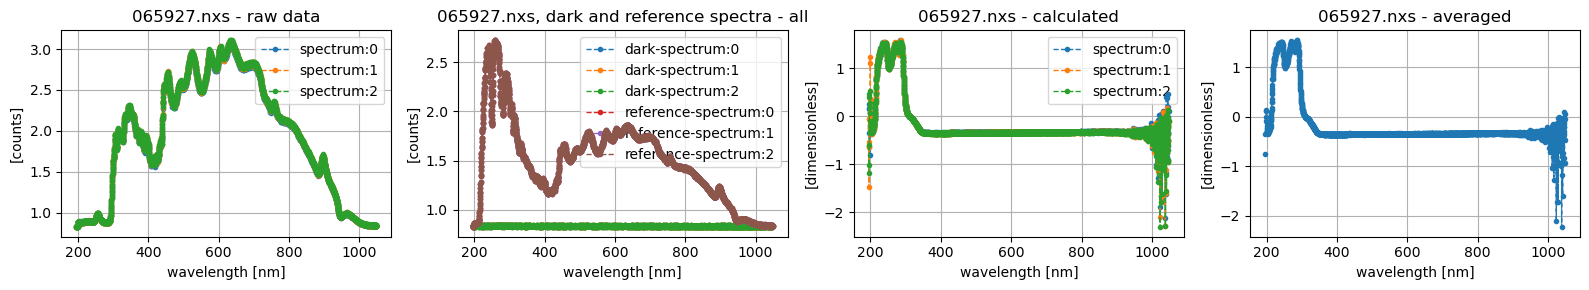

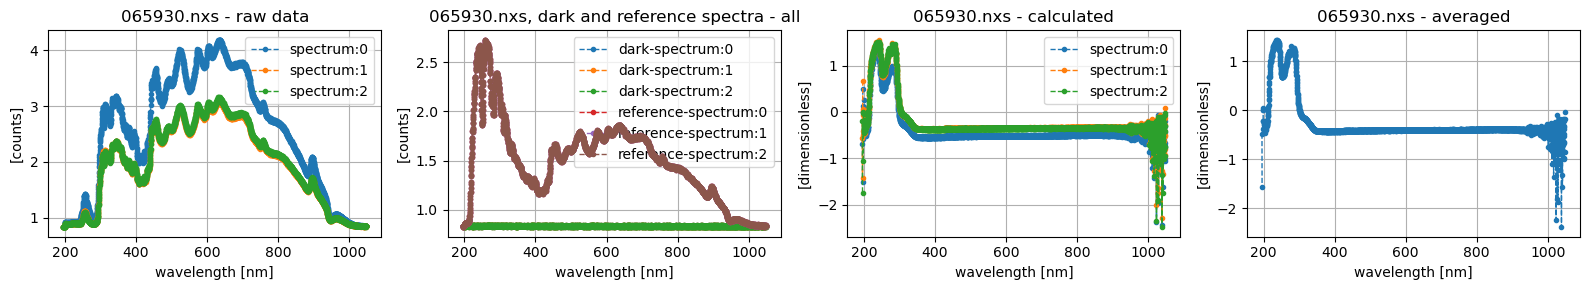

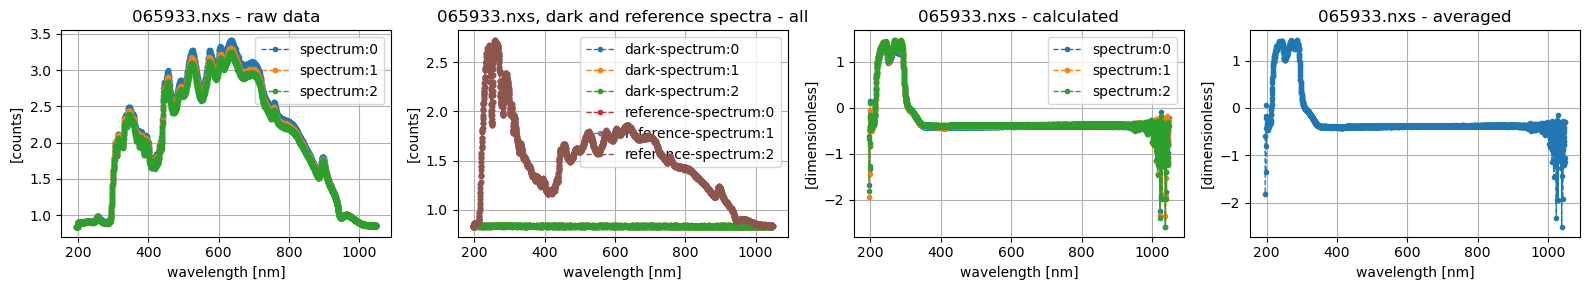

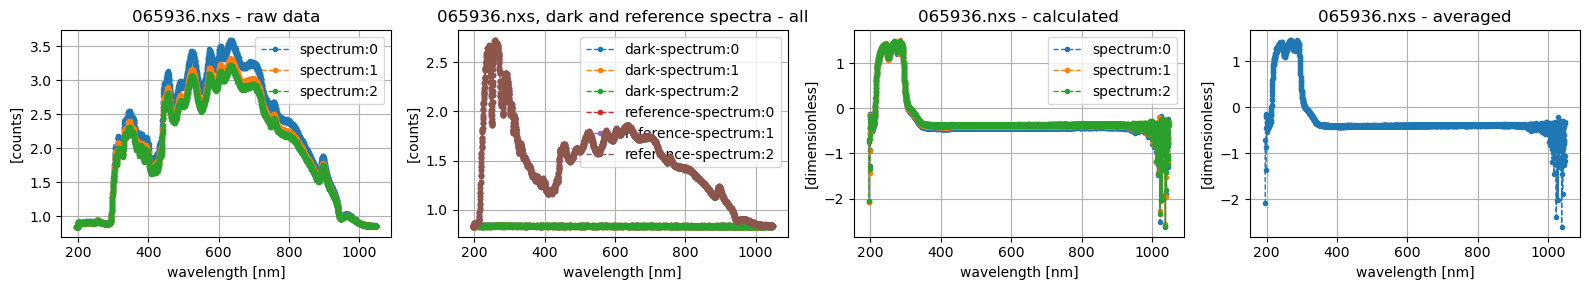

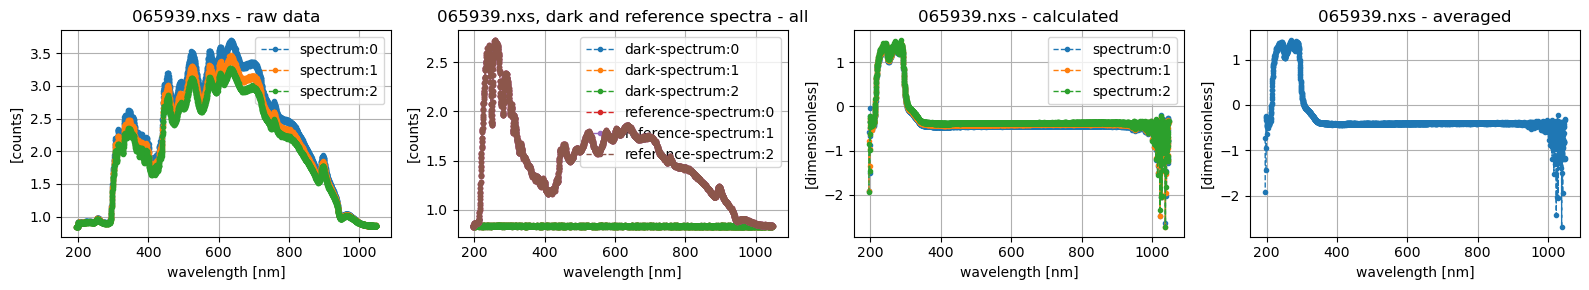

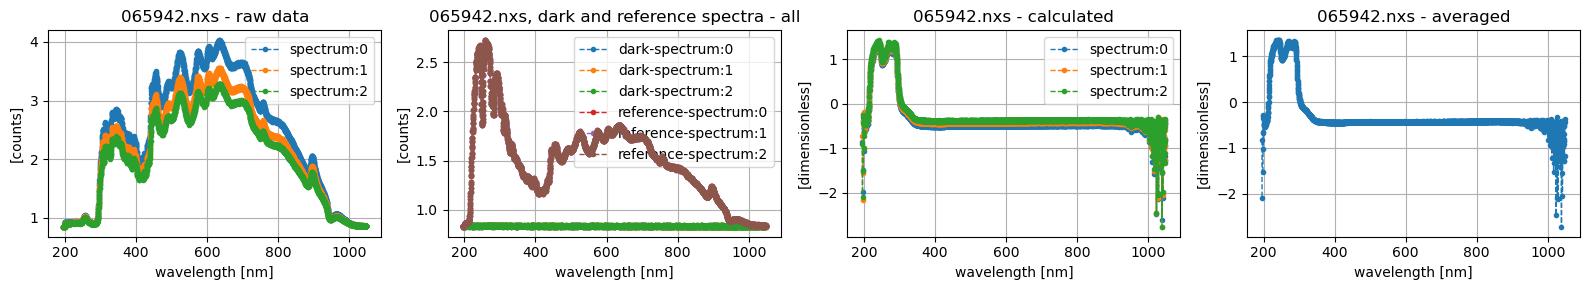

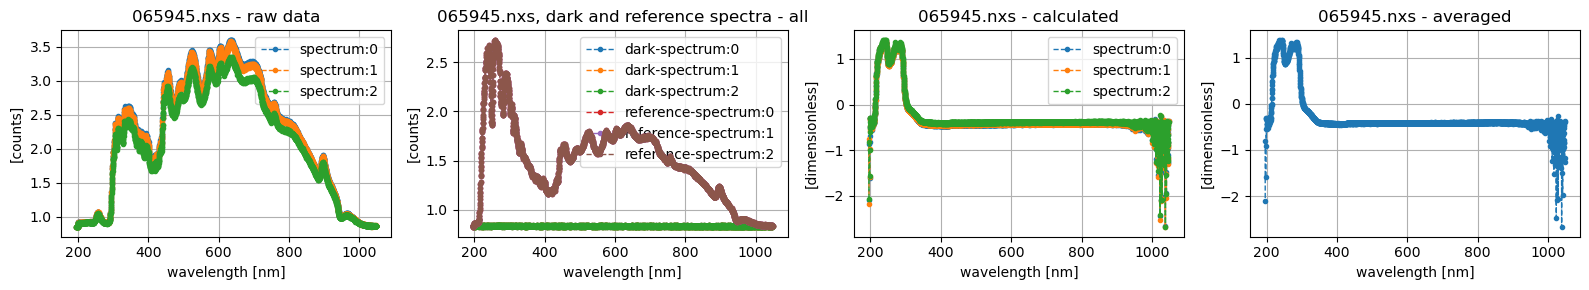

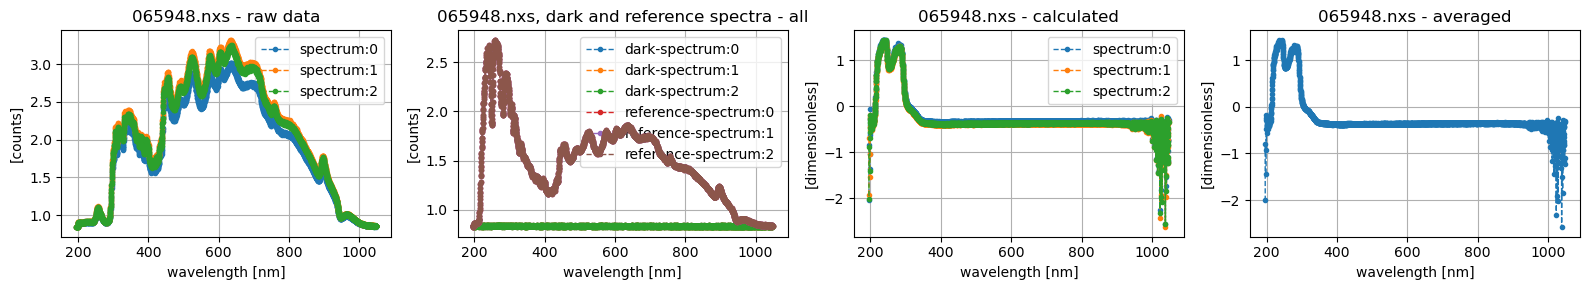

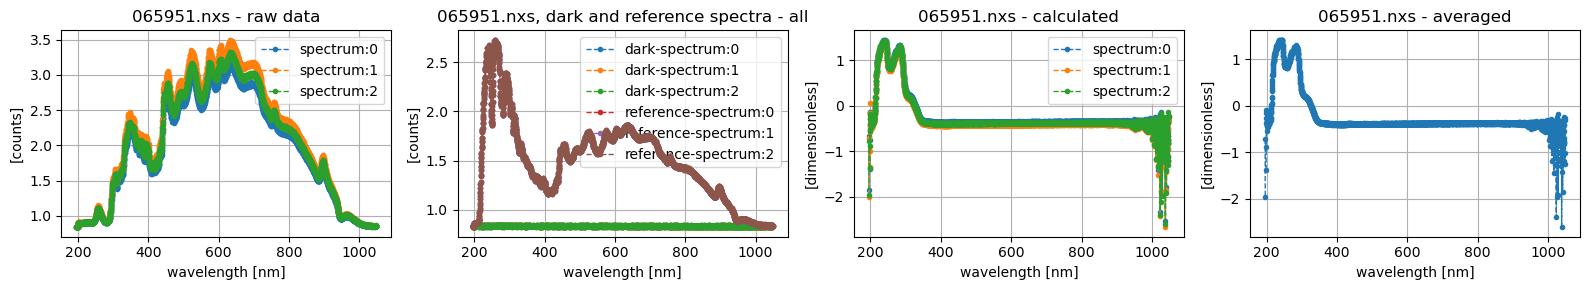

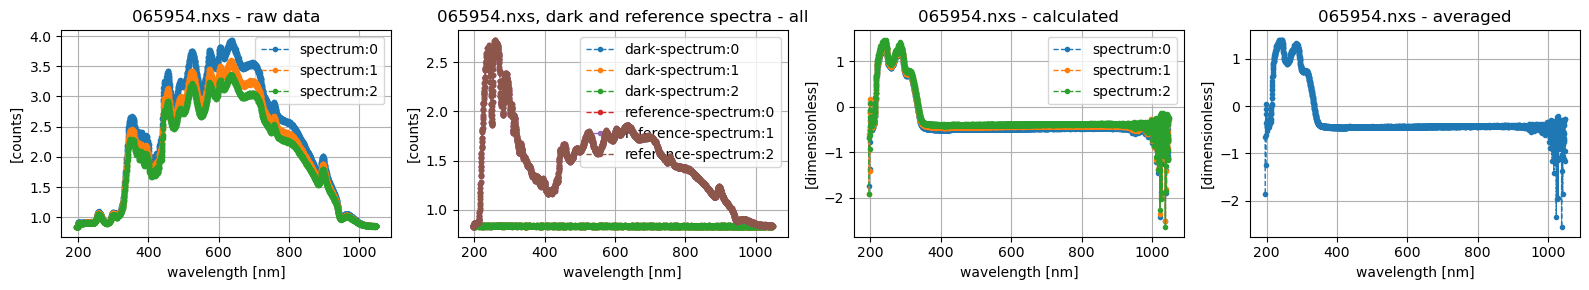

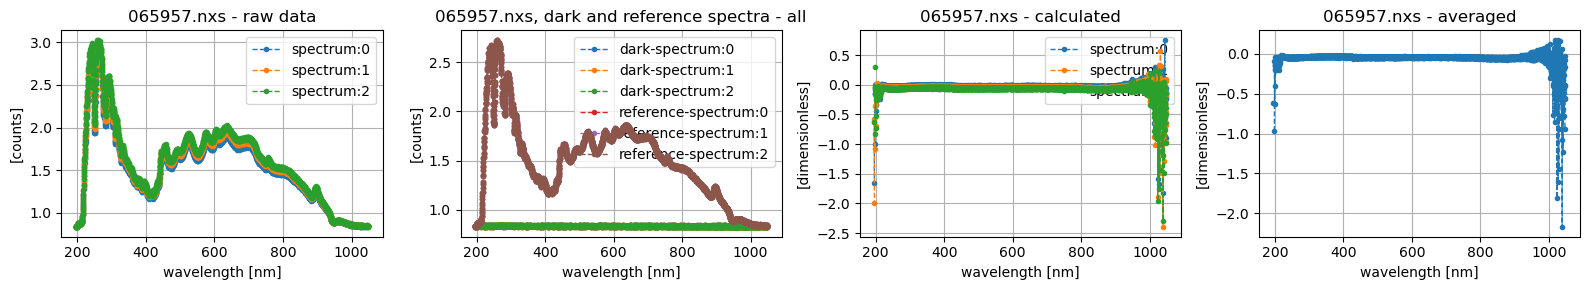

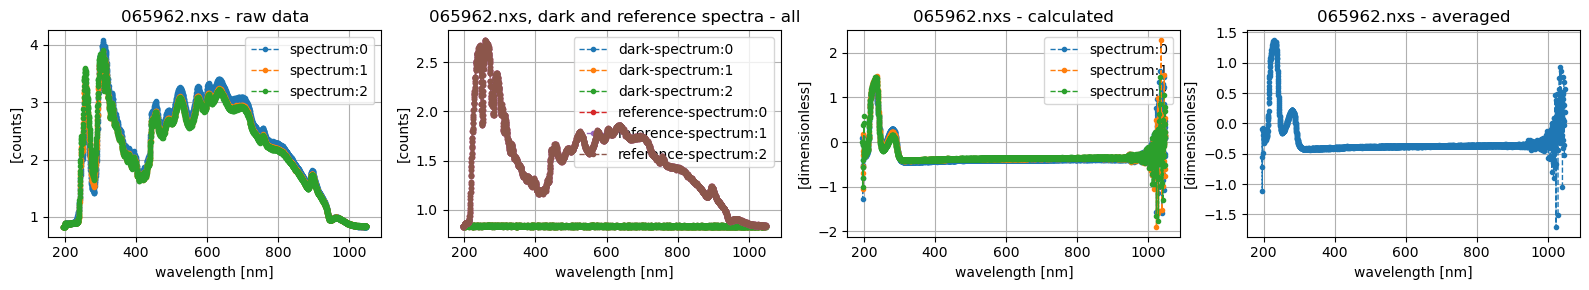

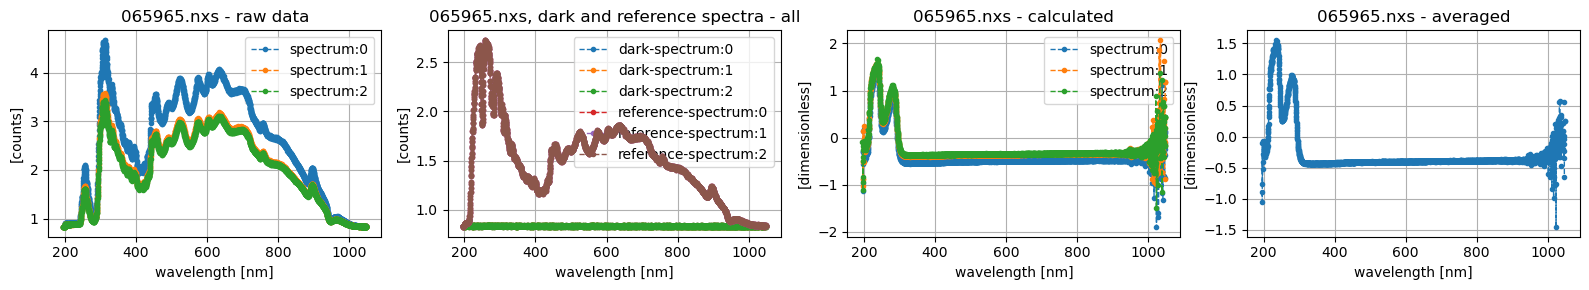

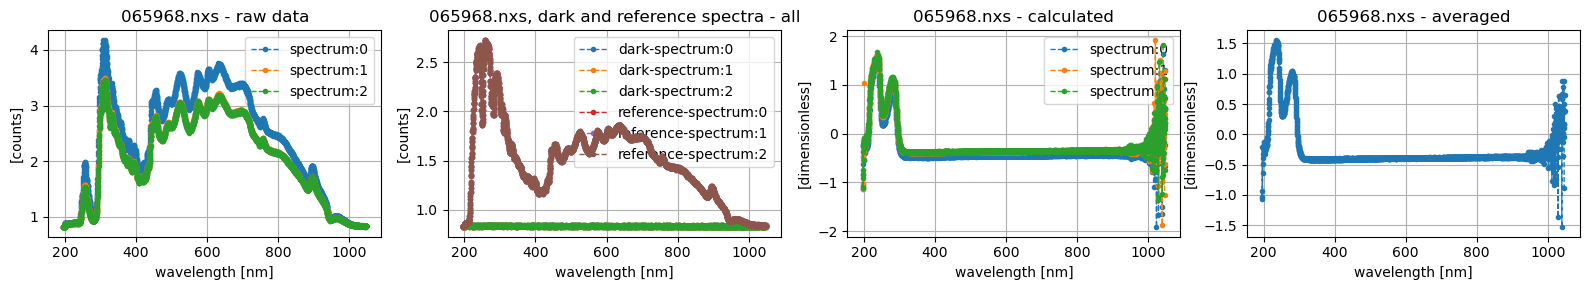

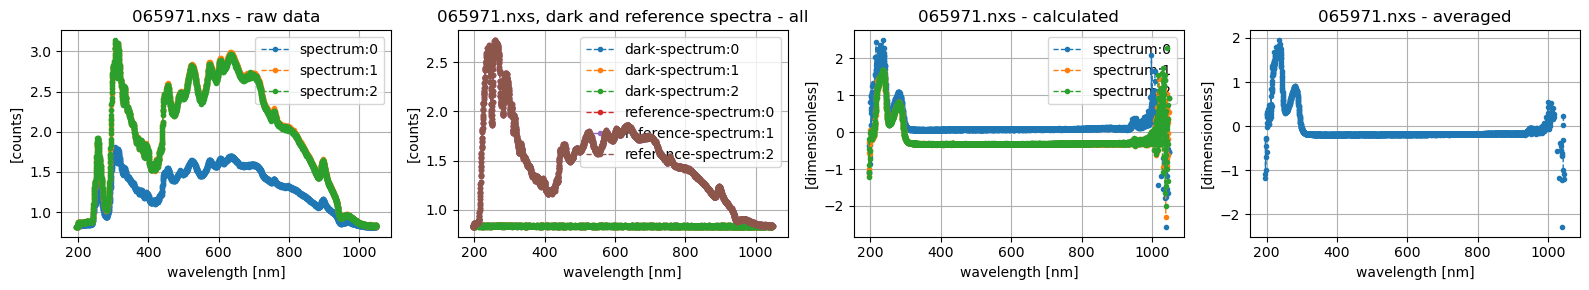

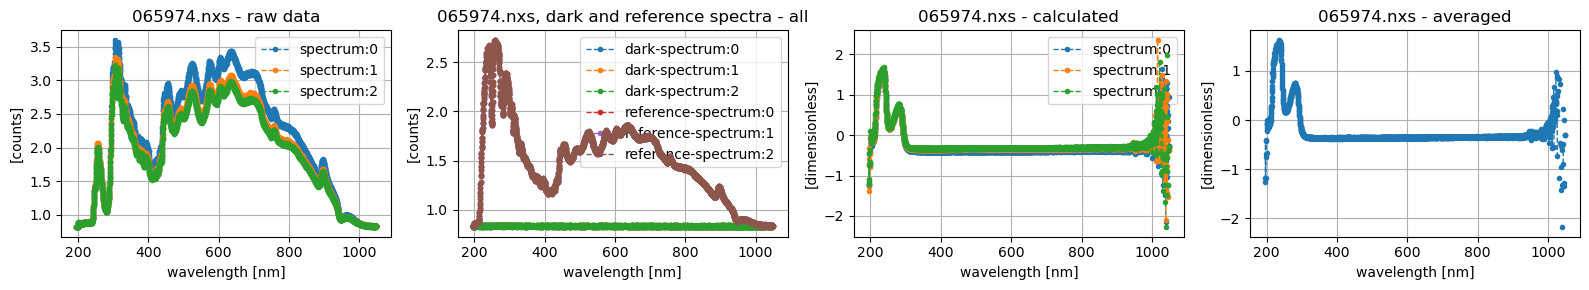

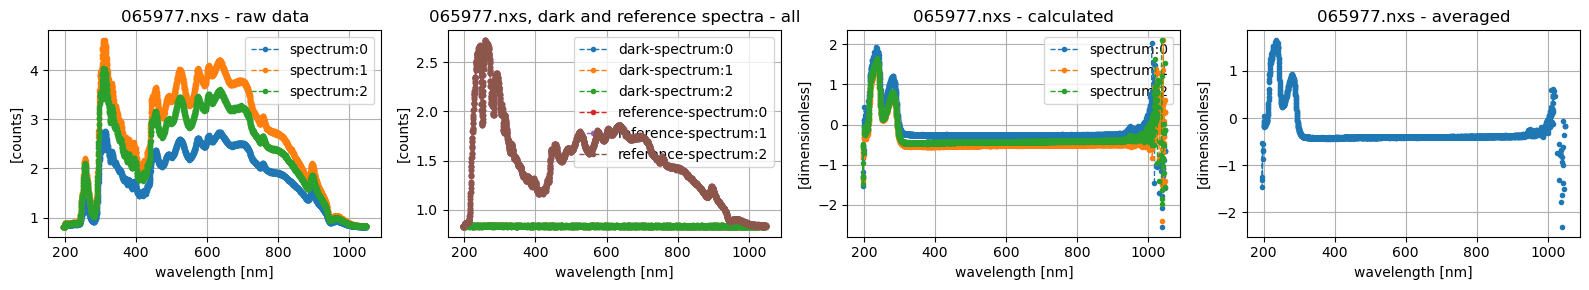

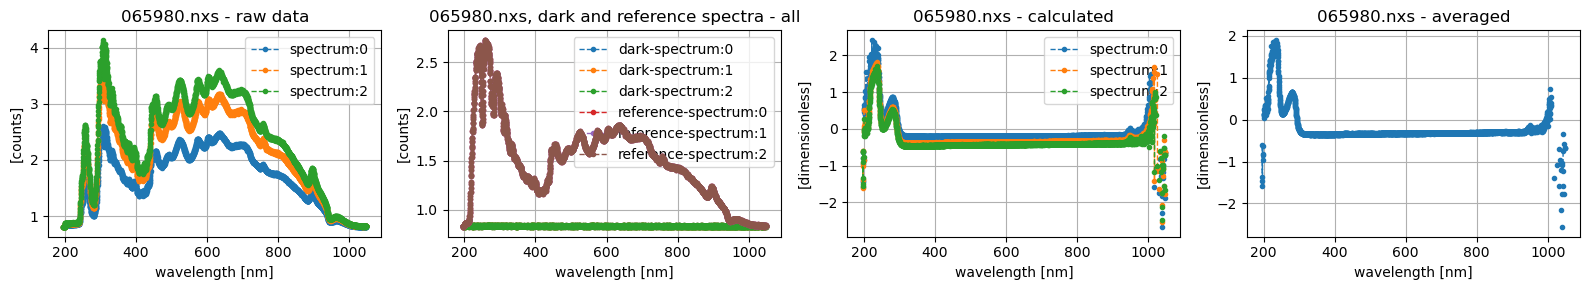

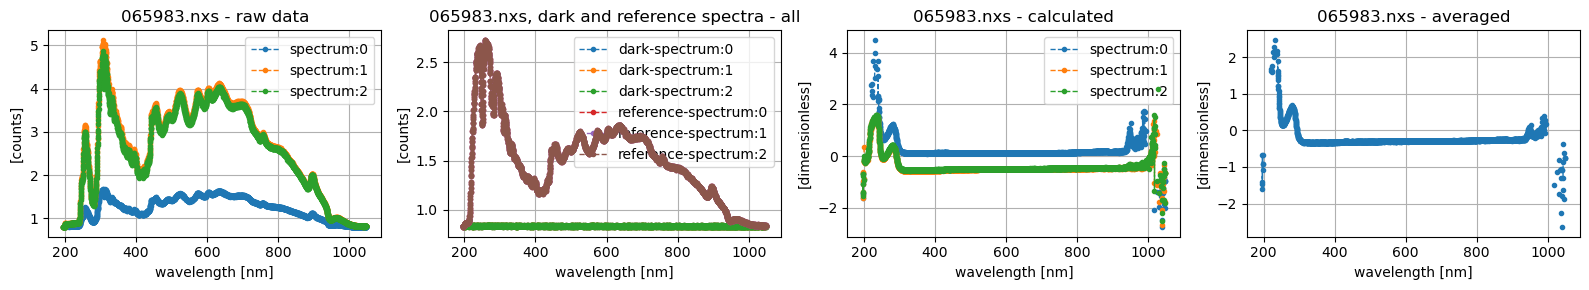

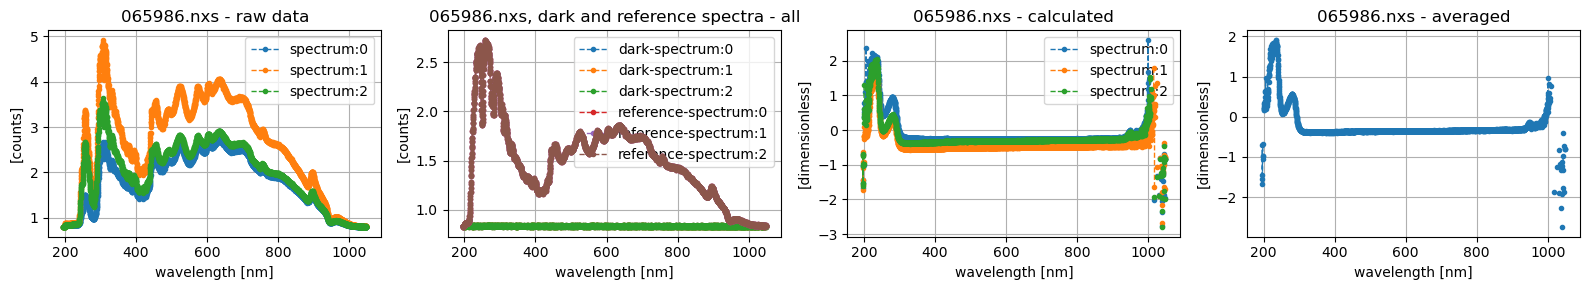

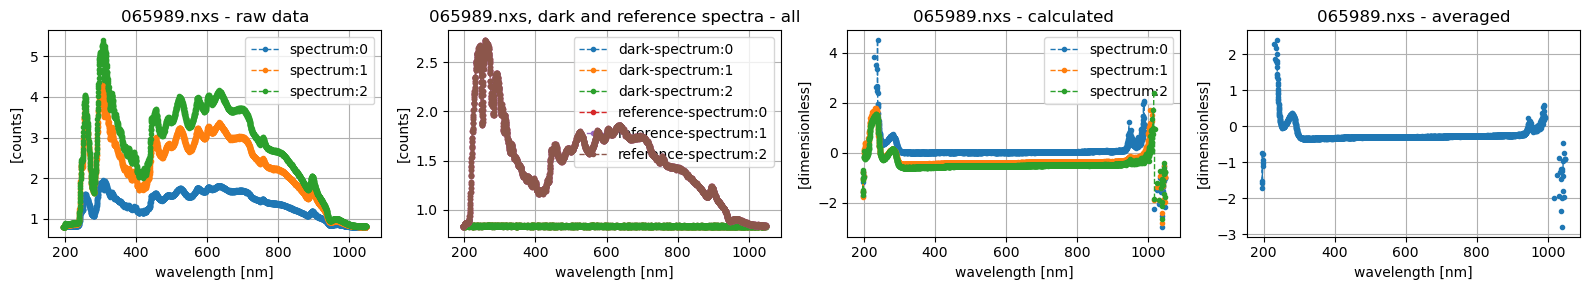

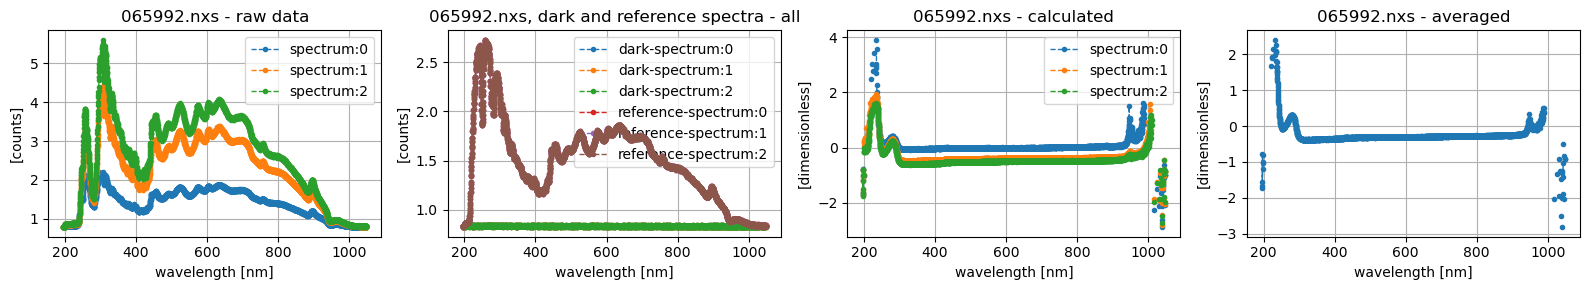

In [6]:
for i in exp2:
    name=ill_auxilliary_funcs.complete_fname(i)
    plot.plot_uv(name)

for m in exp3:
    name=ill_auxilliary_funcs.complete_fname(m)
    plot.plot_uv(name)



In [7]:
# extract value for given wavelength
wavelength=sc.scalar(280,unit='nm')
tol= sc.scalar(0.5,unit='nm')
res=uv.uv_peak_int(uv_da, wavelength, tol=None)
#returns a dict, #TODO: do we want a Dataset here? 
print(res)

{'one_wavelength': <scipp.DataArray>
Dimensions: Sizes[spectrum:2, wavelength:1, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
  wavelength                float64             [nm]  (wavelength)  [280]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [1.77013, 1.80972]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066029.nxs", "066029.nxs"]

, 'wl_interval': <scipp.DataArray>
Dimensions: Sizes[spectrum:2, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool    

How to average mutliple UV spectra in one Loki.nxs file?

In [8]:
name='066017.nxs'
#How to average multiple UV spectra in one LoKI.nxs file?

out1=uv.load_and_normalize_uv(name)
display(out1)

# Apply uv.average_uv function to Loki.nxs
out2=uv.average_uv(name)
display(out2)



<scipp.DataArray>
Dimensions: Sizes[spectrum:2, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [nan, -0.506675, ..., -0.189713, -0.189713]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs"]

<scipp.DataArray>
Dimensions: Sizes[wavelength:3648, ]
Coordinates:
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (wavelength)  [nan, -0.427036, ..., -0.0858921, -0.0858921]
Attributes:
  source                     string        <no unit>  ()  ["066017.nxs"]

Cell below shows how to perform a turbidity correction on data from a single input file. If the user wishes to apply a median_filter beforehand, the user can apply this manually by adding one line of code, see next cell.

<scipp.DataArray>
Dimensions: Sizes[spectrum:2, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [-1.31576, -0.849278, ..., -0.153058, -0.153057]
Attributes:
  b_fit_range                 int64             [nm]  (spectrum)  [500, 800]
  fit-offset_b              float64  [dimensionless]  (spectrum)  [8.57018e+07, 2750.6]
  fit-pcov                  float64  [dimensionless]  (spectrum)  [1, 1]
  fit-slope_m               float64  [dimensionless]  (spectrum)  [3.73645, 1.91812]
  source                     string        <no unit>  (spectrum)  ["066029.nxs", "066029.nxs"]
  turbidity_fit_range         int64             [nm]  (spectrum)  [350, 600]

Turbidity


/opt/anaconda3/envs/dev/lib/python3.9/site-packages/scipp/plotting/figure1d.py:231: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.tight_layout(rect=self.bounding_box)


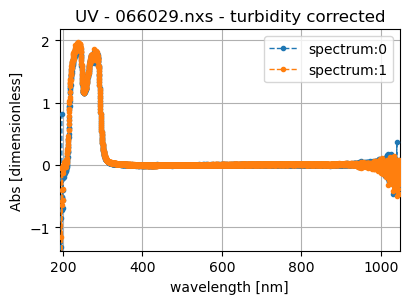

In [9]:
name='066017.nxs'
name='066029.nxs'

#How to perform a turbiity correction on one input file?
#uv_dict=utils.load_nurfloki_file(name,exp_meth)
#uv_da=uv.normalize_uv(**uv_dict)

# Or load like this:
uv_da=uv.load_and_normalize_uv(name)

uv_turb_corr=uv.uv_turbidity_fit(uv_da, fit_llim=None, fit_ulim=None, b_llim=None, b_ulim=None, m=None)
display(uv_turb_corr)


print("Turbidity")

graph_name_turbcorr=f"UV_spectra_{name}_turbcorr.pdf"
graph_out_turbcorr=os.path.join(graphpath_output, graph_name_turbcorr)
cm = 1/2.54  # centimeters in inches
figsize_b=8
figsize_a=1.333*figsize_b
dpi=1200


fig3, ax3 = plt.subplots(1, 1, constrained_layout=True, figsize=(figsize_a*cm, figsize_b*cm) )

turb_corr=sc.plot(sc.collapse(uv_turb_corr,keep="wavelength"),
        linestyle="dashed",
        grid=True,
        marker='.',
        title=f"UV - {name} - turbidity corrected",
        ylabel='Abs [dimensionless]',
        ax=ax3

)

turb_corr.ax.set_xlim([np.min(uv_turb_corr.coords["wavelength"].values)*0.98, np.max(uv_turb_corr.coords["wavelength"].values)])
turb_corr.ax.set_ylim([np.nanmin(uv_turb_corr.data.values)*0.9, np.nanmax(uv_turb_corr.data.values)*1.1])

plt.tight_layout()
plt.savefig(graph_out_turbcorr, dpi=dpi,bbox_inches='tight')
plt.show()



#How to plot the turbidity correction for visual inspection? 
#plot.plot_uv_turbidity_fit(uv_da, fit_llim=None, fit_ulim=None, b_llim=None, b_ulim=None, m=None)


Cell below shows how to perform a turbidity correction on data from a single input file. Here is the example where a median filter is applied before hand.

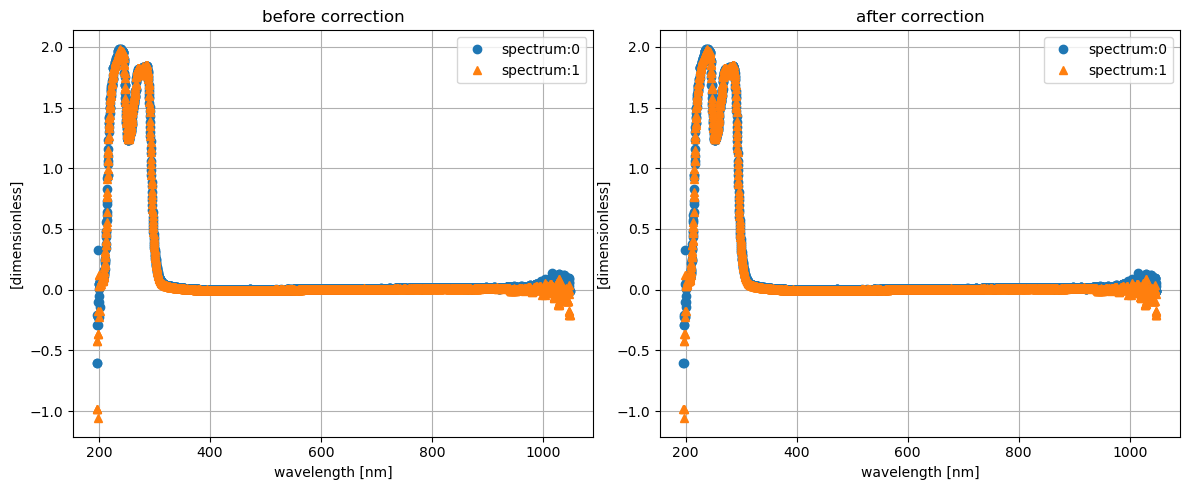

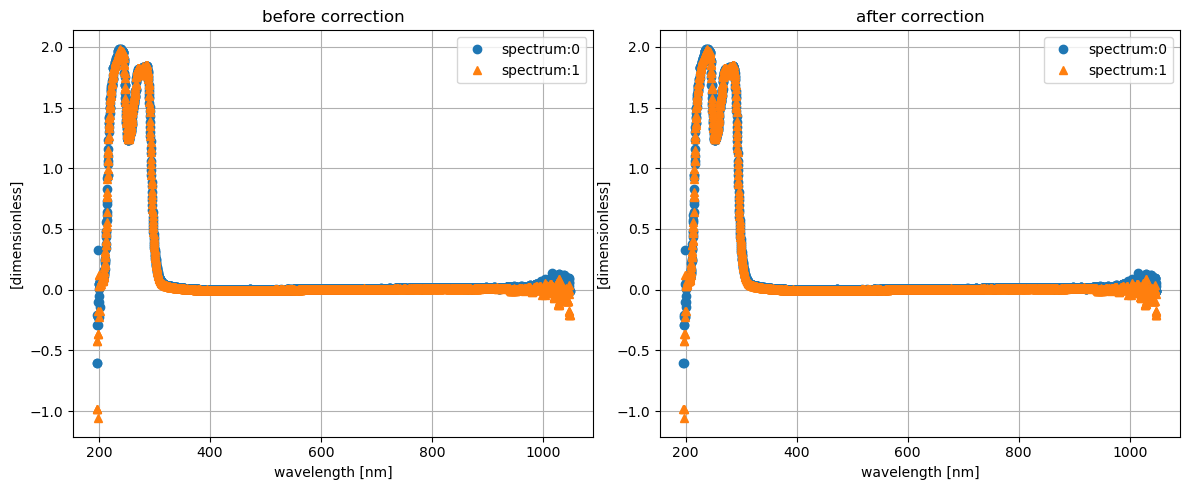

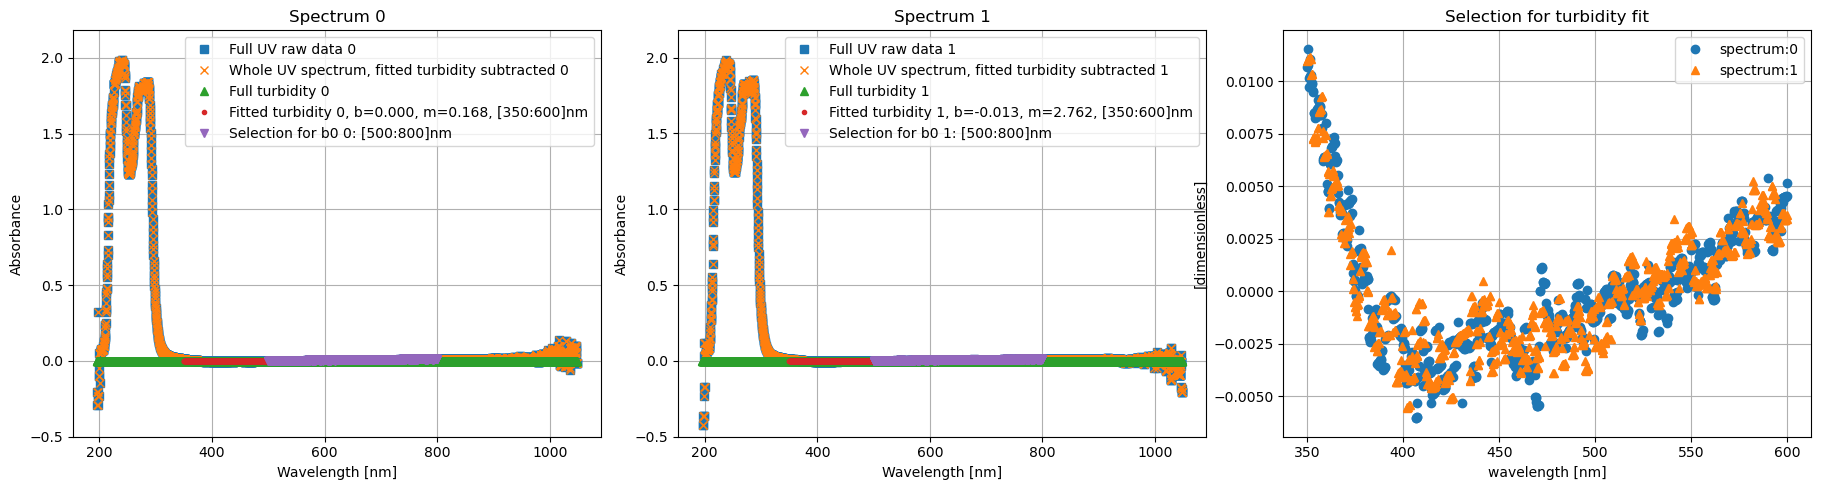

In [10]:
name='066017.nxs'

# Or load like this:
uv_da=uv.load_and_normalize_uv(name)

# How to apply a median filter?
kernel_size=10
#uv_da=utils.nurf_median_filter(uv_da, kernel_size=kernel_size)

#uv_turb_corr_mfilt=uv.uv_turbidity_fit(uv_da, fit_llim=None, fit_ulim=None, b_llim=None, b_ulim=None, m=None)
#display(uv_turb_corr_mfilt)

# Median filter in one line with turbdity_fit
uv_turb_corr_mfilt=uv.uv_turbidity_fit(utils.nurf_median_filter(uv_da, kernel_size=kernel_size), fit_llim=None, fit_ulim=None, b_llim=None, b_ulim=None, m=None)


#How to plot the turbidity correction for visual inspection? 
plot.plot_uv_turbidity_fit(uv_turb_corr_mfilt, fit_llim=None, fit_ulim=None, b_llim=None, b_ulim=None, m=None)


Cell below shows how to perform a turbidity fit on multiple input files **without** previous applying a median filter

<scipp.DataArray>
Dimensions: Sizes[spectrum:4, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000, 4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000, 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [nan, -0.60258, ..., -0.0454493, -0.0454464]
Attributes:
  b_fit_range                 int64             [nm]  (spectrum)  [500, 800, 500, 800]
  fit-offset_b              float64  [dimensionless]  (spectrum)  [3.09114, 9.85345, 0.387804, -0.0125235]
  fit-pcov                  float64  [dimensionless]  (spectrum)  [2, 1, 2, 2]
  fit-slope_m               float64  [dimensionless]  (spectrum)  [0.658027, 0.930984, 0.286149, -0.237433]
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", "066020.nxs", "066020.nxs"]
  turbidity_fit_range         int64             [nm]  (spectrum)  [350, 600, 350, 600]

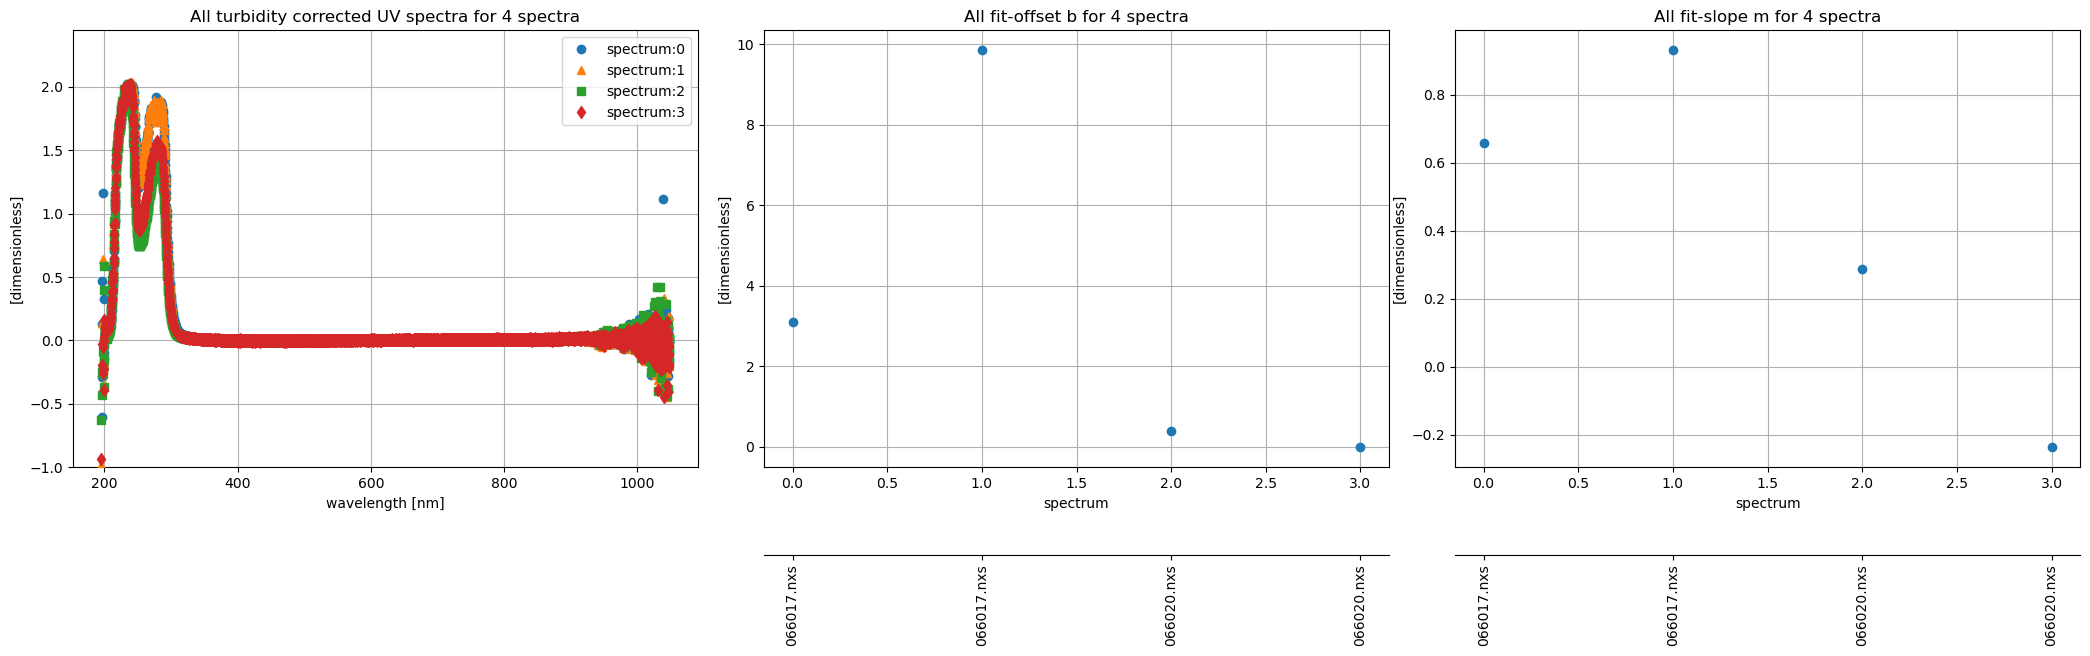

In [11]:

scanlist = [66017, 66020]
filelist=ill.complete_fname(scanlist)

# apply turbidity correction to multiple files
# create first a dict of sc.DataArray, where each array corresponds to a Loki.file
dict_da={name:uv.load_and_normalize_uv(name) for name in [name for name in filelist]} 
# alternative that works, but maybe not so nice :-)
#d={name:uv.load_and_normalize_uv(name) for name in [name for name in ill.complete_fname(scanlist)]} 


# apply turbidity fit to all spectra inside each Loki.file and to multiple files at once
res_da=uv.uv_multi_turbidity_fit(dict_da)

display(res_da)

# plot turbidity corrected files
plot.plot_uv_multi_turbidity_fit(dict_da)

Cell below shows how to perform a turbidity fit on multiple input files **with** applying a median filter

<scipp.DataArray>
Dimensions: Sizes[spectrum:4, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000, 4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000, 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [0.468813, -0.287732, ..., -0.11356, -0.113557]
Attributes:
  b_fit_range                 int64             [nm]  (spectrum)  [500, 800, 500, 800]
  fit-offset_b              float64  [dimensionless]  (spectrum)  [2.96737, 10.0426, 0.384259, -0.0116538]
  fit-pcov                  float64  [dimensionless]  (spectrum)  [2, 1, 1, 1]
  fit-slope_m               float64  [dimensionless]  (spectrum)  [0.651274, 0.934521, 0.284643, -0.248981]
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", "066020.nxs", "066020.nxs"]
  turbidity_fit_range         int64             [nm]  (spectrum)  [350, 600, 350, 600]

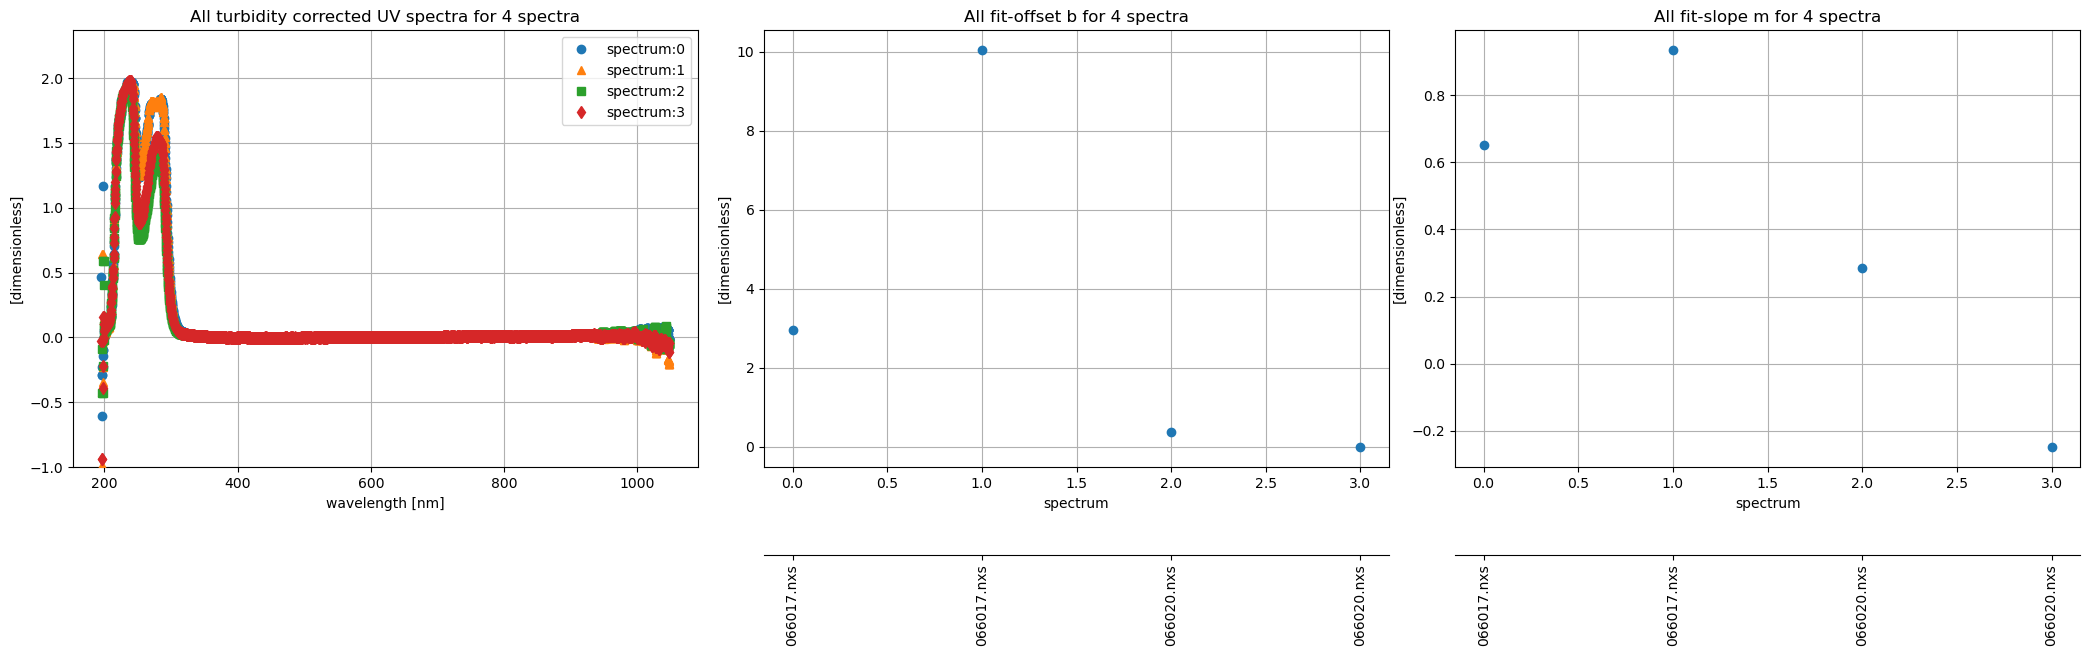

In [12]:
scanlist = [66017, 66020]
filelist=ill.complete_fname(scanlist)

kernel_size=15

# apply turbidity correction to multiple files
# create first a dict of sc.DataArray, where each array corresponds to a Loki.file
# for each sc.DataArray the nurf_median_filter is applied with above kernel_size
dict_da={name:utils.nurf_median_filter(uv.load_and_normalize_uv(name), kernel_size=kernel_size) for name in [name for name in filelist]} 


# apply turbidity fit to all spectra inside each Loki.file and to multiple files at once
res_da=uv.uv_multi_turbidity_fit(dict_da)

display(res_da)

# plot turbidity corrected files
plot.plot_uv_multi_turbidity_fit(dict_da)

How to gather the spectra of multiple files in one sc.DataArray or in one sc.Dataset?


In [13]:
#How to gather the spectra of multiple files in one sc.DataArray or in one sc.Dataset?
filesetlist=ill.complete_fname(exp5)
uv_da=uv.gather_uv_set(filesetlist)
display(uv_da)

#if all files contain the same number of UV spectra, a sc.DataSet is returned 
filesetlist_3files=ill.complete_fname([66017, 66020, 66023])
uv_ds=uv.gather_uv_set(filesetlist_3files)
display(uv_ds)


<scipp.DataArray>
Dimensions: Sizes[spectrum:17, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000, ..., 4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True, ..., True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False, ..., False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000, ..., 1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
                            float32  [dimensionless]  (spectrum, wavelength)  [nan, -0.506675, ..., -0.0732869, -0.0732869]
Attributes:
  source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs", ..., "066043.nxs", "066046.nxs"]

<scipp.Dataset>
Dimensions: Sizes[spectrum:2, wavelength:3648, ]
Coordinates:
  integration_time            int32            [µs]  (spectrum)  [4000, 4000]
  is_dark                      bool        <no unit>  (spectrum)  [False, False]
  is_data                      bool        <no unit>  (spectrum)  [True, True]
  is_reference                 bool        <no unit>  (spectrum)  [False, False]
  time                        int64        <no unit>  (spectrum)  [1655992257000000, 1655992257000000]
  wavelength                float32             [nm]  (wavelength)  [195.674, 195.938, ..., 1047.73, 1047.93]
Data:
  066017.nxs                float32  [dimensionless]  (spectrum, wavelength)  [nan, -0.506675, ..., -0.189713, -0.189713]
    Attributes:
        source                     string        <no unit>  (spectrum)  ["066017.nxs", "066017.nxs"]
  066020.nxs                float32  [dimensionless]  (spectrum, wavelength)  [-0.541114, -0.161576, ..., -0.110737, -0.110737]
    Attributes:
        source                     string        <no unit>  (spectrum)  ["066020.nxs", "066020.nxs"]
  066023.nxs                float32  [dimensionless]  (spectrum, wavelength)  [-0.376765, -0.0408369, ..., -0.0233135, -0.0233135]
    Attributes:
        source                     string        <no unit>  (spectrum)  ["066023.nxs", "066023.nxs"]

In [14]:
%%time

name='066017.nxs'
da = uv.load_and_normalize_uv(name)

#How to apply the scipp.ndimage.median_filter to an sc.DataArray? 
#Current NUrF has non-equaled spaced data, only int is accepeted.
#Otherwise: kernel_size=sc.scalar(2.5, units='nm') as example should work.
kernel_size=15 
da_filt=utils.nurf_median_filter(da, kernel_size=kernel_size)

#plot all contributions
legend_props = {"show": True, "loc": 1}
fig1=sc.plot(sc.collapse(da, keep='wavelength'),title='before any median filter',legend=legend_props, marker='.')
fig2=sc.plot(sc.collapse(da_filt, keep='wavelength'), marker='.', title=f'after median filter - scipp, size={kernel_size} ',legend=legend_props)

display(fig1,fig2)




CPU times: user 920 ms, sys: 299 ms, total: 1.22 s
Wall time: 346 ms


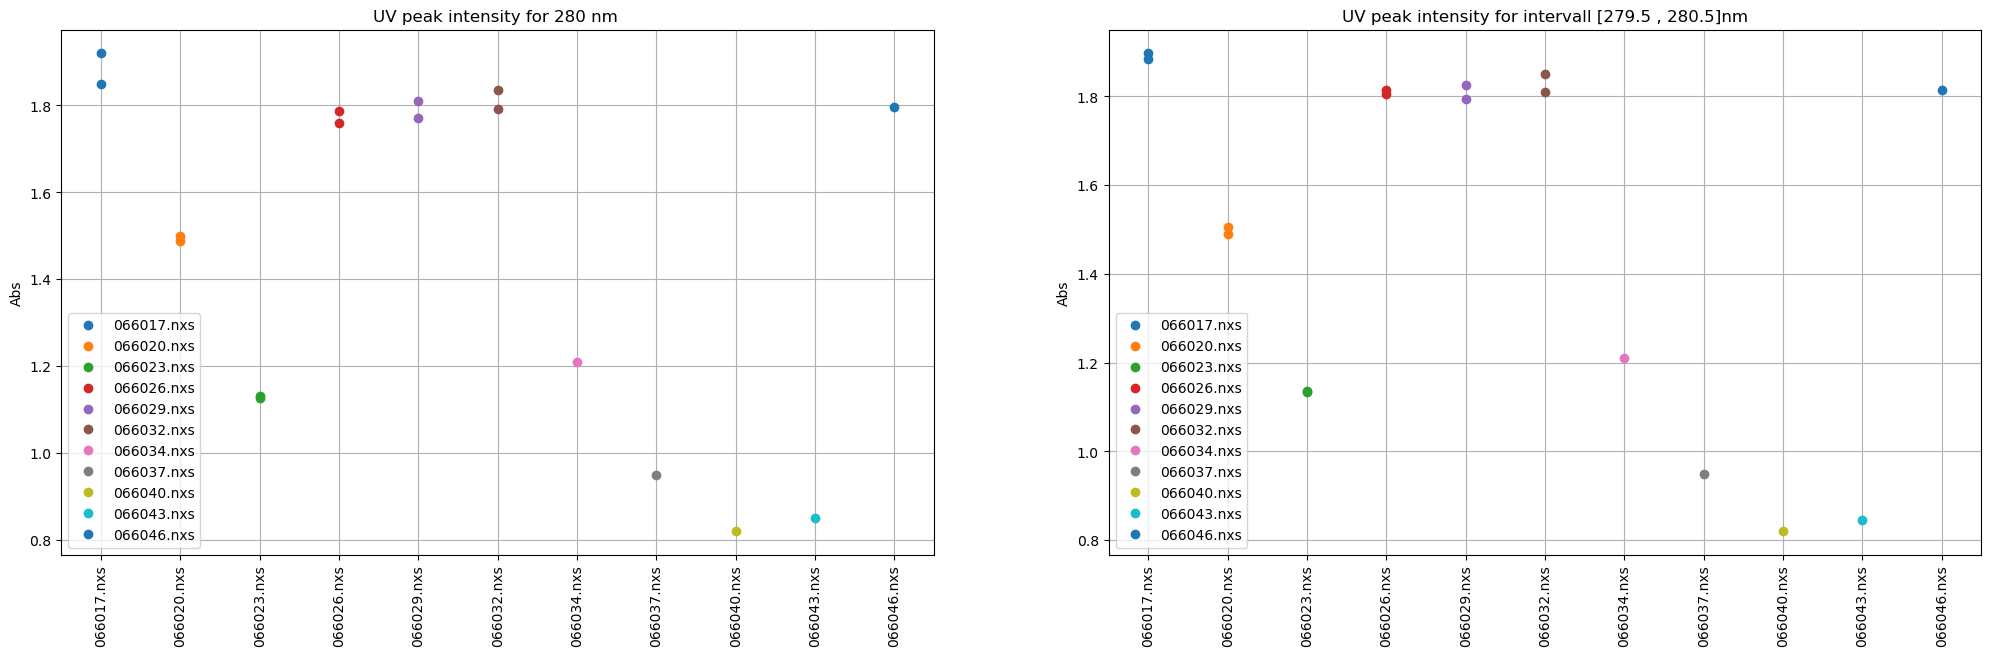

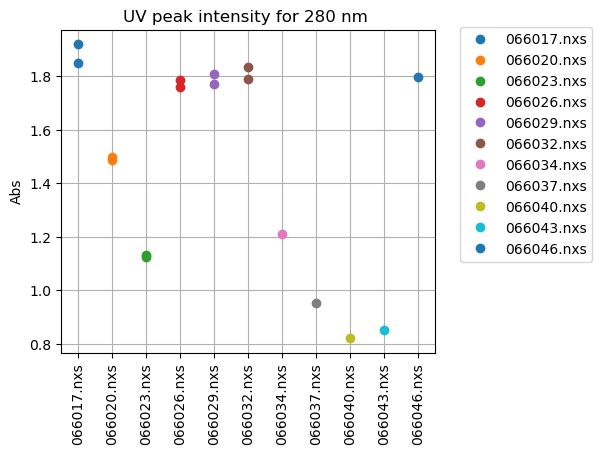

In [15]:
filesetlist=ill.complete_fname(exp5)
plot.plot_multiple_uv_peak_int(filesetlist, wavelength= sc.scalar(280, unit='nm'))
graph_name=f"UV_peak_exp5.pdf"
graph_out=os.path.join(graphpath_output, graph_name)
plt.savefig(graph_out,dpi=1200,bbox_inches='tight')